In [57]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform
from sklearn.preprocessing import PowerTransformer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import jenkspy

In [2]:
data_ntl_l8=gpd.read_file('Result/zonal_stat_grid_L8.gpkg')

In [3]:
data_ntl_l8['ID']=data_ntl_l8.index+1

In [4]:
data_ntl_l8

,data,mean,count,sum,mean_weight,count_weight,geometry,ID
0,7104080.0,0.000000,64,0.000000,0.00000,0,"POLYGON ((127.13469 4.77057, 127.13469 4.73599...",1
1,7104080.0,0.080993,72,5.831515,0.36447,16,"POLYGON ((127.10011 4.73599, 127.10011 4.70141...",2
2,7104060.0,0.000000,72,0.000000,0.00000,0,"POLYGON ((126.75435 4.52853, 126.75435 4.49396...",3
3,7104070.0,0.000000,64,0.000000,0.00000,0,"POLYGON ((126.78893 4.52853, 126.78893 4.49396...",4
4,7104070.0,0.000000,64,0.000000,0.00000,0,"POLYGON ((126.82350 4.52853, 126.82350 4.49396...",5
...,...,...,...,...,...,...,...,...
12685,7301011.0,0.000000,72,0.000000,0.00000,0,"POLYGON ((121.84455 -7.36562, 121.84455 -7.400...",12686
12686,7301011.0,0.000000,72,0.000000,0.00000,0,"POLYGON ((121.77540 -7.40020, 121.77540 -7.434...",12687
12687,7301011.0,0.000000,72,0.000000,0.00000,0,"POLYGON ((121.77540 -7.46935, 121.77540 -7.503...",12688
12688,7301011.0,0.000000,64,0.000000,0.00000,0,"POLYGON ((121.80998 -7.46935, 121.80998 -7.503...",12689


In [5]:
data_ntl_l8[['mean','count','sum','mean_weight','count_weight']].describe()

,mean,count,sum,mean_weight,count_weight
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,0.090462,68.871001,6.153181,0.144990,3.719622
std,1.708639,5.376237,110.853340,1.724896,11.381686
min,0.000000,64.000000,0.000000,0.000000,0.000000
25%,0.000000,64.000000,0.000000,0.000000,0.000000
50%,0.000000,72.000000,0.000000,0.000000,0.000000
75%,0.000000,72.000000,0.000000,0.000000,0.000000
max,175.325378,81.000000,11220.824219,175.325378,81.000000


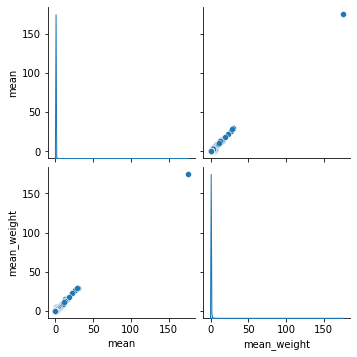

In [6]:
sns.pairplot(data_ntl_l8[['mean','mean_weight']],diag_kind='kde')

In [7]:
pt_mean = PowerTransformer(method='yeo-johnson',standardize=True)
pt_mean.fit(data_ntl_l8['mean'].values.reshape(-1,1))
data_ntl_l8['yj_mean']=pt_mean.transform(data_ntl_l8['mean'].values.reshape(-1,1))

In [8]:
pt_mean_w = PowerTransformer(method='yeo-johnson',standardize=True)
pt_mean_w.fit(data_ntl_l8['mean'].values.reshape(-1,1))
data_ntl_l8['yj_mean_w']=pt_mean_w.transform(data_ntl_l8['mean'].values.reshape(-1,1))

In [9]:
data_ntl_l8[['yj_mean','yj_mean_w']].describe()

,yj_mean,yj_mean_w
count,1.269000e+04,1.269000e+04
mean,-1.791755e-17,-1.791755e-17
std,1.000039e+00,1.000039e+00
min,-4.117796e-01,-4.117796e-01
25%,-4.117796e-01,-4.117796e-01
50%,-4.117796e-01,-4.117796e-01
75%,-4.117796e-01,-4.117796e-01
max,2.982540e+00,2.982540e+00


<AxesSubplot:xlabel='yj_mean', ylabel='Density'>

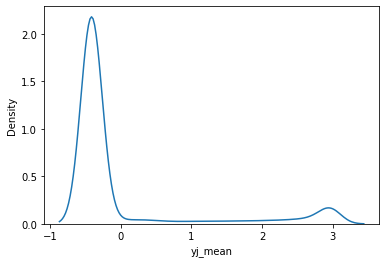

In [10]:
sns.kdeplot(data_ntl_l8.yj_mean)

<AxesSubplot:xlabel='yj_mean_w', ylabel='Density'>

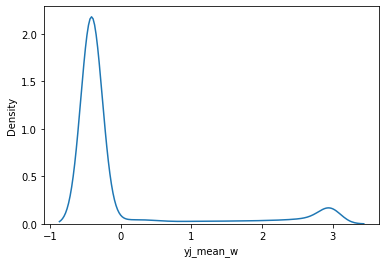

In [11]:
sns.kdeplot(data_ntl_l8.yj_mean_w)

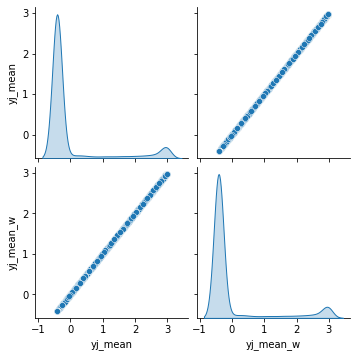

In [12]:
sns.pairplot(data_ntl_l8[['yj_mean','yj_mean_w']],diag_kind='kde')

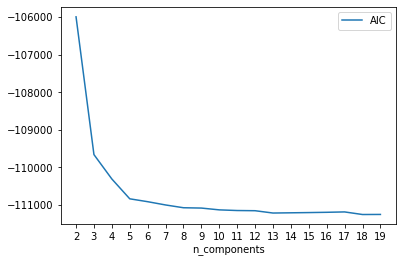

In [42]:
n_components = np.arange(2, 20)
temp_data=data_ntl_l8.yj_mean_w.values.reshape(-1,1)
models = [GaussianMixture(n, covariance_type='full', random_state=123).fit(temp_data)
          for n in n_components]

plt.plot(n_components, [m.aic(temp_data) for m in models], label='AIC')
plt.xticks(range(2, 20))
plt.legend(loc='best')
plt.xlabel('n_components');

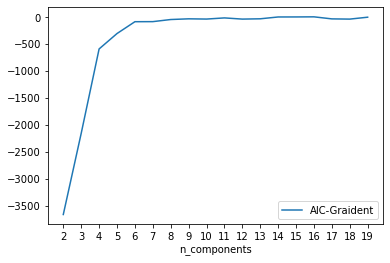

In [43]:
plt.plot(n_components, np.gradient([m.aic(temp_data) for m in models]), label='AIC-Graident')
plt.xticks(range(2, 20))
plt.legend(loc='best')
plt.xlabel('n_components');

In [27]:
silhouette_coefficients = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(temp_data)
    score = silhouette_score(temp_data, kmeans.labels_)
    silhouette_coefficients.append(score)

Text(0, 0.5, 'Silhouette Coefficient')

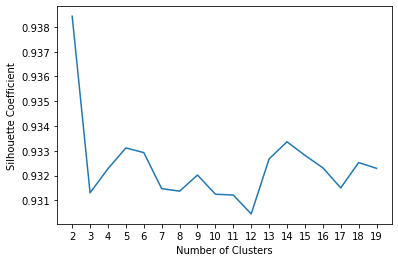

In [28]:
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")

In [59]:
def goodness_of_variance_fit(array, classes):
    classes = jenkspy.jenks_breaks(array, classes)
    classified = np.array([classify(i, classes) for i in array])
    maxz = max(classified)
    zone_indices = [[idx for idx, val in enumerate(classified) if zone + 1 == val] for zone in range(maxz)]
    sdam = np.sum((array - array.mean()) ** 2)
    array_sort = [np.array([array[index] for index in zone]) for zone in zone_indices]
    sdcm = sum([np.sum((classified - classified.mean()) ** 2) for classified in array_sort])
    gvf = (sdam - sdcm) / sdam
    return gvf

def classify(value, breaks):
    for i in range(1, len(breaks)):
        if value < breaks[i]:
            return i
    return len(breaks) - 1

Text(0, 0.5, 'GVF')

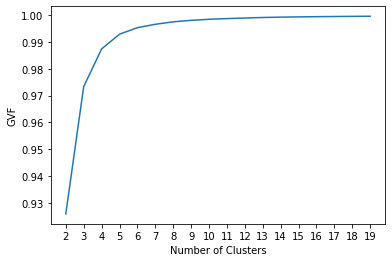

In [68]:
gvf = []
nclasses = 2
while nclasses < 20:
    gvf.append(goodness_of_variance_fit(temp_data, nclasses))
    nclasses += 1
plt.plot(range(2, 20), gvf)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("GVF")

In [69]:
gmm_=models[3].fit_predict(temp_data)

In [70]:
gmm_=models[3].fit_predict(temp_data)

In [71]:
gmm_=models[3].fit_predict(temp_data)

In [72]:
data_ntl_l8['GMM_bin']=gmm_.astype(str)

In [73]:
classes = jenkspy.jenks_breaks(temp_data, 5)
classified = np.array([classify(i, classes) for i in temp_data])

In [99]:
data_ntl_l8['Jenks_bin']=classified.astype(str)

In [100]:
data_ntl_l8[['yj_mean_w','GMM_bin']].groupby(['GMM_bin']).agg(['count','sum','mean','min','max'])

yj_mean_w                                           
            count          sum      mean       min       max
GMM_bin                                                     
0           10422 -4291.567230 -0.411780 -0.411780 -0.411780
1             648  1800.169950  2.778040  2.393687  2.976352
2             513    91.392507  0.178153 -0.349972  0.718274
3             667  1087.989260  1.631168  0.720649  2.390259
4             440  1312.015512  2.981853  2.976471  2.982540

In [101]:
data_ntl_l8[['yj_mean_w','Jenks_bin']].groupby(['Jenks_bin']).agg(['count','sum','mean','min','max'])

yj_mean_w                                           
              count          sum      mean       min       max
Jenks_bin                                                     
1             10572 -4317.844343 -0.408423 -0.411780 -0.023456
2               398   144.772616  0.363750 -0.022422  0.831566
3               336   440.988360  1.312465  0.834438  1.743230
4               388   847.442853  2.184131  1.745061  2.538579
5               996  2884.640514  2.896225  2.538795  2.982540

In [102]:
pd.pivot_table(data_ntl_l8, index='Jenks_bin',columns='GMM_bin',values='yj_mean',aggfunc='count').fillna(0)

GMM_bin,0,1,2,3,4
Jenks_bin,,,,,
1,10422.0,0.0,150.0,0.0,0.0
2,0.0,0.0,363.0,35.0,0.0
3,0.0,0.0,0.0,336.0,0.0
4,0.0,92.0,0.0,296.0,0.0
5,0.0,556.0,0.0,0.0,440.0


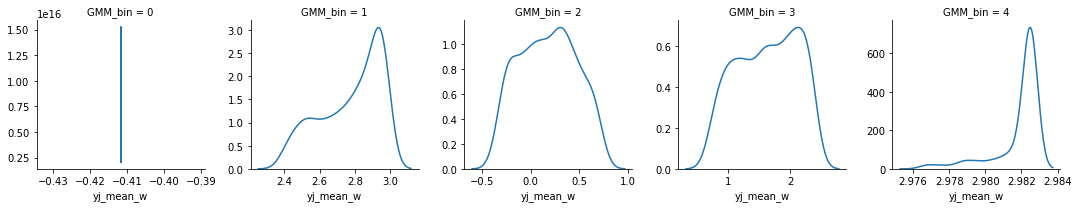

In [115]:
g = sns.FacetGrid(data_ntl_l8, col="GMM_bin",sharex=False,sharey=False,col_order=['0','1','2','3','4'])
g.map(sns.kdeplot, "yj_mean_w")

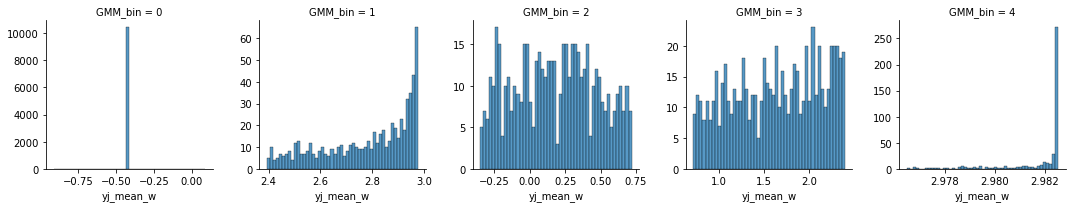

In [117]:
g = sns.FacetGrid(data_ntl_l8, col="GMM_bin",sharex=False,sharey=False,col_order=['0','1','2','3','4'])
g.map(sns.histplot, "yj_mean_w",bins=50)

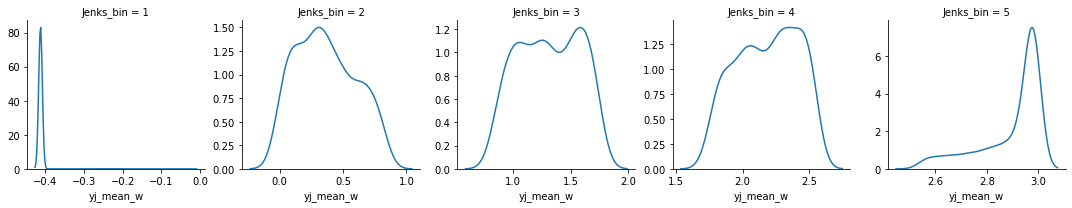

In [118]:
g = sns.FacetGrid(data_ntl_l8, col="Jenks_bin",sharex=False,sharey=False,col_order=['1','2','3','4','5'])
g.map(sns.kdeplot, "yj_mean_w")

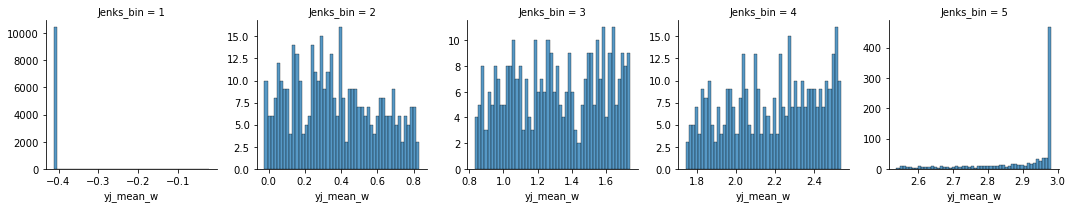

In [119]:
g = sns.FacetGrid(data_ntl_l8, col="Jenks_bin",sharex=False,sharey=False,col_order=['1','2','3','4','5'])
g.map(sns.histplot, "yj_mean_w",bins=50)

<AxesSubplot:xlabel='yj_mean_w', ylabel='Count'>

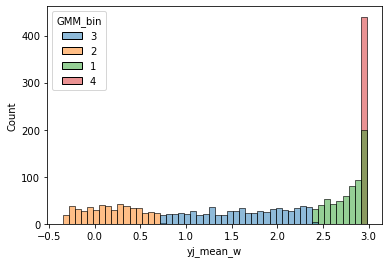

In [120]:
sns.histplot(data=data_ntl_l8.query('GMM_bin!=\'0\''),x='yj_mean_w',hue='GMM_bin', bins=50)

<AxesSubplot:xlabel='yj_mean_w', ylabel='Count'>

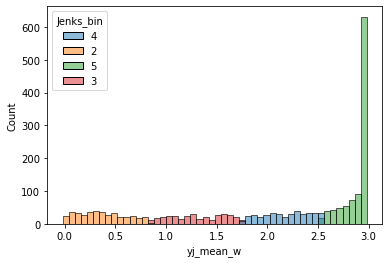

In [121]:
sns.histplot(data=data_ntl_l8.query('Jenks_bin!=\'1\''),x='yj_mean_w',hue='Jenks_bin', bins=50)

In [122]:
data_ntl_l8['IDKEC']=data_ntl_l8.data.apply(lambda y: str(int(y)))

In [125]:
data_ntl_l8['GRID_SAT']=data_ntl_l8.ID.apply(lambda y:'CNN_DIMG_IND_2015_LS_256_3840_'+str(y).zfill(6)+'_REV.tif')
data_ntl_l8['GRID_SAT_JPG']=data_ntl_l8.ID.apply(lambda y:'CNN_DIMG_IND_2015_LS_256_3840_'+str(y).zfill(6)+'_REV.jpg')

In [126]:
data_ntl_l8[['IDKEC','GMM_bin','Jenks_bin','GRID_SAT','GRID_SAT_JPG','yj_mean_w','mean_weight']].to_csv('Result/bin_cluster_GMM.csv',index=False,sep=';')